# Numerical solution of the non-dimensional equation of motion for a mass falling with quadratic drag

The equation to solve is
$$ \frac{dv}{dt} = v^2 - 1$$

In [19]:
from numpy import *
from math import *
from matplotlib import *

Define the step size and the initial height. These parameters can be changed here, to see the effects on the solution. The initial velocity is zero.

In [20]:
h = 0.01  # step size
x_0 = 2.  # initial height

Now we can calculate the position and velocity iteratively. We can also calculate the exact position and velocity at each time step for comparison later. These are
$$ v_{exact} = - \tanh(t)$$
and
$$ x_{exact} = x_0 - \ln(\cosh(t))$$

In [21]:
t = [0]
x = [x_0]   # height from which object is dropped
v = [0]   # initial velocity

xexact = [x_0]
vexact = [0]

Define the functions that return the exact values of the position and the velocity:

In [22]:
def fnx_exact(x0, t):
    return x_0 - log(cosh(t))

def fnv_exact(t):
    return -tanh(t)

Now we aready to start calculating the position and velocity iteratively. First, from $x_0$ and $v_0=0$ we calculate $x_1$ and $v_1$ using a simple forward Euler approximation:
\begin{align*}
x_1 &= x_0\\
v_1 &= -h
\end{align*}
We also calculate the exact values at $t=h$.

In [23]:
t.append(h)
x.append(x_0)
v.append(-h)

xexact.append(fnx_exact(x_0, h))
vexact.append(fnv_exact(h))

Then we iterate until the object reaches the ground, that is while $x>0$. Notice that the calculation actually ends when the position becomes negative, so the plots will only be drawn up to the previous step, which we will call $N$. And we also calculate the exact values for comparison later.

In [24]:
i = 1
while (x[i] > 0):
    i += 1
    t.append(i*h)
    x.append(2*x[i-1] - x[i-2] + h**2*(v[i-1]**2 - 1))
    v.append((x[i] - x[i-2])/(2*h))
    xexact.append(fnx_exact(x_0, i*h))
    vexact.append(fnv_exact(i*h))
    
N = i-1

Just for fun, we will print the duration of the fall, and the final velocity and position. If $x_0$ is high enough, the final velocity should be near the terminal velocity, which is $-1$.

In [15]:
print "TOF =", N*h
print "Final velocity =", v[N]
print "Final position =", x[N]
print "Exact final velocity =", vexact[N]
print "Exact final position =", xexact[N]

TOF = 2.6
Final velocity = -0.994486564411
Final position = 0.0820440928261
Exact final velocity = -0.989027402201
Exact final position = 0.0876457766503


In [16]:
# Plot the position as a function of time

plot(t[0:N], x[0:N], lw=2, color='red')
xlabel("$T$")
ylabel("$X$")
show()

NameError: name 'plot' is not defined

In [17]:
# Plot the velocity as a function of time

plot(t[0:N], v[0:N], lw=2, color='red')
xlabel("$T$")
ylabel("$V$")
show()

NameError: name 'plot' is not defined

Now for comparison purposes, we will plot the exact position (blue curve) with the numerical solution every 0.2 time units (red circles). You can change the step size $h$ to something larger, like $0.1$, at the beginning see how the match degrades.

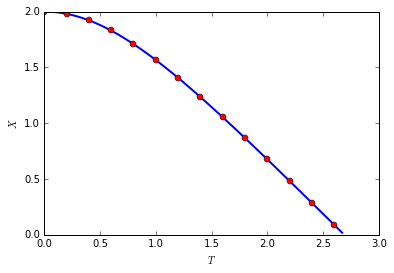

In [126]:
plot(t[0:N], xexact[0:N], lw=2)
step = int(0.2/h)
plot(t[0:N:step], x[0:N:step], marker="o", color='red', linestyle='None')
xlabel("$T$")
ylabel("$X$")
show()

And the same for the velocity:

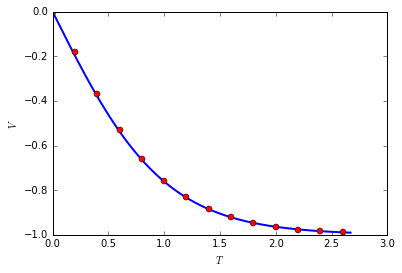

In [127]:
plot(t[0:N], vexact[0:N], lw=2)
step = int(0.2/h)
plot(t[0:N:step], v[0:N:step], marker="o", color='red', linestyle='None')
xlabel("$T$")
ylabel("$V$")
show()